In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Load the data
file_path = "wpbc.data" #/content/sample_data/wpbc.data
df = pd.read_csv(file_path, header=None, na_values='?')
# Select the first 130 non-recurrent and first 37 recurrent
nonrecurrents = df[df[1] == 'N'].iloc[:130]
recurrents = df[df[1] == 'R'].iloc[:37]
# Define the train set
train_df = pd.concat([nonrecurrents, recurrents])
record = 196
if record not in train_df.index:
    train_df = pd.concat([train_df, df.loc[[record]]])

In [ ]:
# (c) Replace missing values in the lymph node feature with the median value
train_df = train_df.copy()
lymph_node = train_df.columns[-1]
median_nodes = train_df[lymph_node].median()
train_df[lymph_node] = train_df[lymph_node].fillna(median_nodes)

Confusion Matrix:
 [[94 26]
 [22 16]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       120
           1       0.38      0.42      0.40        38

    accuracy                           0.70       158
   macro avg       0.60      0.60      0.60       158
weighted avg       0.71      0.70      0.70       158

AUC Score: 0.680


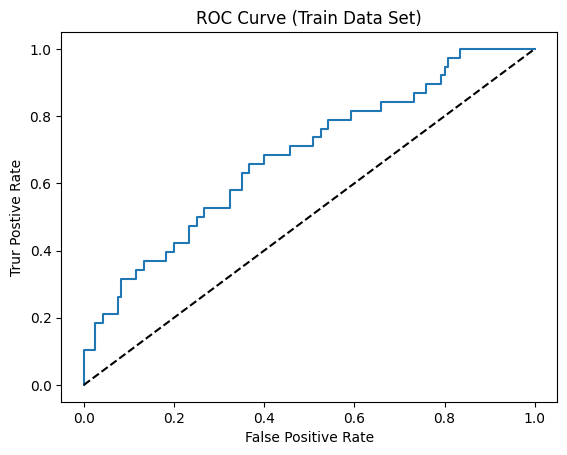

Confusion Matrix:
 [[25  6]
 [ 5  4]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.40      0.44      0.42         9

    accuracy                           0.72        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.74      0.72      0.73        40

AUC Score: 0.674


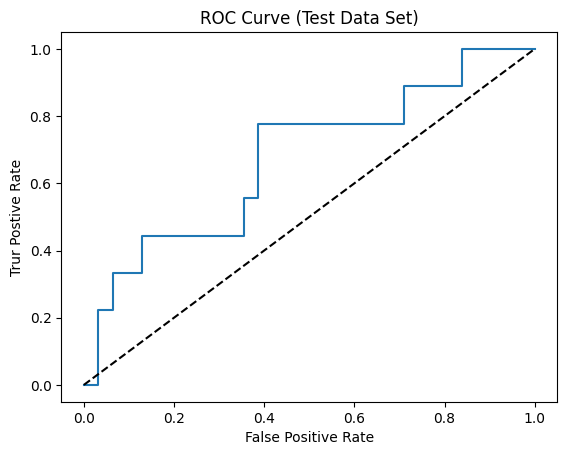

In [ ]:
# (d)(i)
X = df.iloc[:, 3:].astype(float)
y = df[1].map({'N': 0, 'R': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.fillna(X_train.median(),inplace=True)
X_test.fillna(X_test.median(),inplace=True)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
#Define afunction to evaluate model including auc score,roc curve,recall,f1-score
def evaluate_model(y_true, y_pred, y_prob, dataset_name):
    auc = roc_auc_score(y_true, y_prob)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print(f"AUC Score: {auc:.3f}")
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("Trur Postive Rate")
    plt.title(f"ROC Curve ({dataset_name})")
    plt.show()
evaluate_model(y_train, y_train_pred, nb.predict_proba(X_train)[:, 1], "Train Data Set")
evaluate_model(y_test, y_test_pred, nb.predict_proba(X_test)[:, 1], "Test Data Set")

Confusion Matrix:
 [[65 25]
 [36 54]]
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        90
           1       0.68      0.60      0.64        90

    accuracy                           0.66       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.66      0.66      0.66       180

AUC Score: 0.737


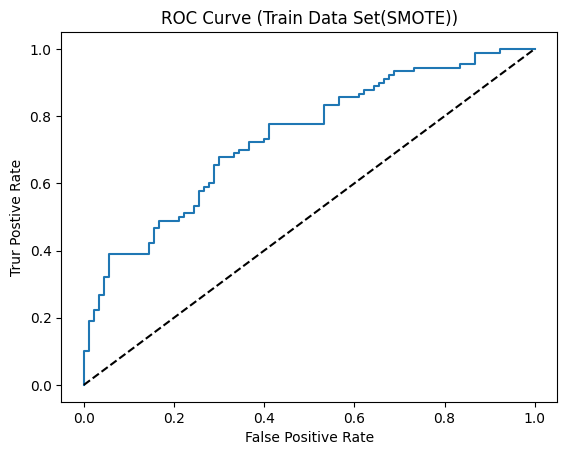

Confusion Matrix:
 [[22  9]
 [ 5  4]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.31      0.44      0.36         9

    accuracy                           0.65        40
   macro avg       0.56      0.58      0.56        40
weighted avg       0.70      0.65      0.67        40

AUC Score: 0.652


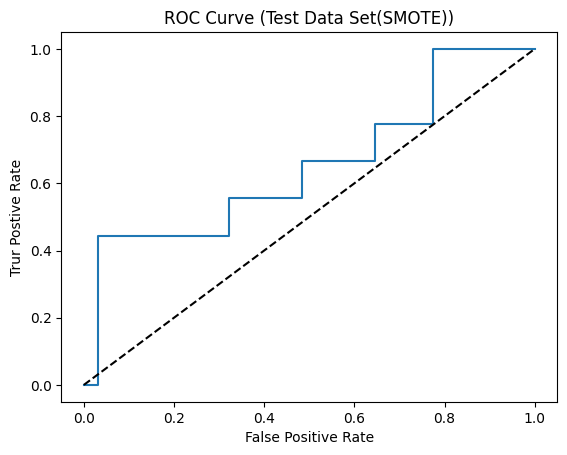

In [ ]:
#(d)(ii)
#downssampling the common class in the training set ot 90 instance and upsampling the uncommon class to 90 instances.
down_sample = RandomUnderSampler(sampling_strategy={0: 90})
X_train_down_sample, y_train_down_sample = down_sample.fit_resample(X_train, y_train)
smote = SMOTE(sampling_strategy={1: 90}, k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_down_sample, y_train_down_sample)
nb_balanced = GaussianNB()
nb_balanced.fit(X_train_smote, y_train_smote)
y_train_ds_pred = nb_balanced.predict(X_train_smote)
y_test_ds_pred = nb_balanced.predict(X_test)
evaluate_model(y_train_smote, y_train_ds_pred, nb_balanced.predict_proba(X_train_smote)[:, 1], "Train Data Set(SMOTE)")
evaluate_model(y_test, y_test_ds_pred, nb_balanced.predict_proba(X_test)[:, 1], "Test Data Set(SMOTE)")

Based on result,the auc score,recall,F1-score of train data set are both higher after SMOTE,which means SMOTE does help.